In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as img
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import os
import random
from PIL import Image
import sys=
from tqdm.notebook import tqdm
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
for dirname, _, filenames in os.walk('E:\ML PROJECT\Human Action Recognition (HAR)'):
    for filename in filenames:http://localhost:8888/notebooks/HAR.ipynb#
        print(os.path.join(dirname, filename))

E:\ML PROJECT\Human Action Recognition (HAR)\archive.zip
E:\ML PROJECT\Human Action Recognition (HAR)\archive_2.zip
E:\ML PROJECT\Human Action Recognition (HAR)\HAS.ipynb
E:\ML PROJECT\Human Action Recognition (HAR)\Presentation1.pptx
E:\ML PROJECT\Human Action Recognition (HAR)\Testing_set.csv
E:\ML PROJECT\Human Action Recognition (HAR)\Training_set.csv
E:\ML PROJECT\Human Action Recognition (HAR)\test\Image_1.jpg
E:\ML PROJECT\Human Action Recognition (HAR)\test\Image_10.jpg
E:\ML PROJECT\Human Action Recognition (HAR)\test\Image_100.jpg
E:\ML PROJECT\Human Action Recognition (HAR)\test\Image_1000.jpg
E:\ML PROJECT\Human Action Recognition (HAR)\test\Image_1001.jpg
E:\ML PROJECT\Human Action Recognition (HAR)\test\Image_1002.jpg
E:\ML PROJECT\Human Action Recognition (HAR)\test\Image_1003.jpg
E:\ML PROJECT\Human Action Recognition (HAR)\test\Image_1004.jpg
E:\ML PROJECT\Human Action Recognition (HAR)\test\Image_1005.jpg
E:\ML PROJECT\Human Action Recognition (HAR)\test\Image_1006.jp

In [2]:
df = pd.read_csv(r"E:\ML PROJECT\Human Action Recognition
                 (HAR)/Training_set.csv")
df

filename               label
0          Image_1.jpg             sitting
1          Image_2.jpg        using_laptop
2          Image_3.jpg             hugging
3          Image_4.jpg            sleeping
4          Image_5.jpg        using_laptop
...                ...                 ...
12595  Image_12596.jpg             sitting
12596  Image_12597.jpg            clapping
12597  Image_12598.jpg             sitting
12598  Image_12599.jpg             dancing
12599  Image_12600.jpg  listening_to_music

[12600 rows x 2 columns]

In [3]:
df.dtypes

filename    object
label       object
dtype: object

In [4]:
df.isnull().sum()

filename    0
label       0
dtype: int64

In [5]:
counts = df['label'].value_counts()
counts

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64

In [6]:
def displayRandom(n=1):
    plt.figure(figsize=(20,20))
    for i in range(n):
        rnd = random.randint(0,len(df)-1)
        img_file = 'E:\ML PROJECT\Human Action Recognition (HAR)/train/'
             + df['filename'][rnd]

        if os.path.exists(img_file):
            plt.subplot(n//2+1, 2, i + 1)
            image = img.imread(img_file)
            plt.imshow(image)
            plt.title(df['label'][rnd])

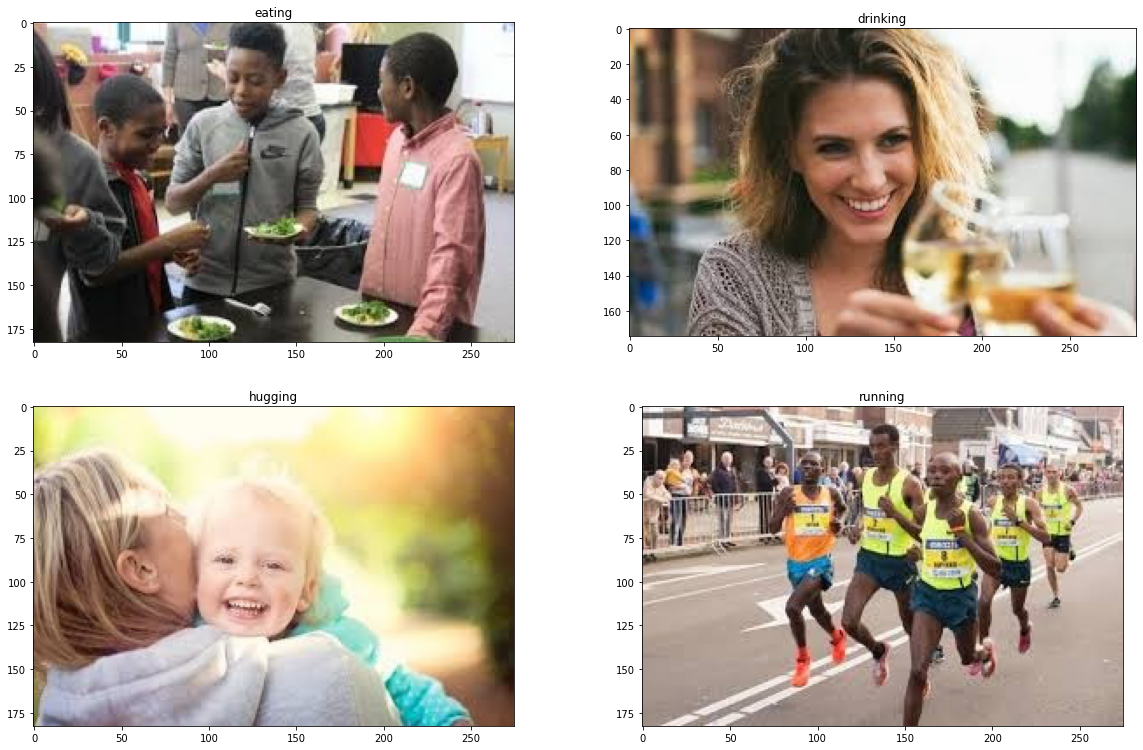

In [7]:
displayRandom(4)

In [8]:
lb = LabelBinarizer()
y = lb.fit_transform(df['label'])
classes = lb.classes_
print(classes)

['calling' 'clapping' 'cycling' 'dancing' 'drinking' 'eating' 'fighting'
 'hugging' 'laughing' 'listening_to_music' 'running' 'sitting' 'sleeping'
 'texting' 'using_laptop']


In [11]:
x = df['filename'].values

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,
                                                    random_state=100) 

In [13]:
# Load pixel data as a list of numpy arrays

img_data = []
size = len(x_train)

for i in tqdm(range(size)):
    image = Image.open('E:\ML PROJECT\Human Action Recognition (HAR)/train/' 
                       + x_train[i])
    img_data.append(np.asarray(image.resize((160,160))))

  0%|          | 0/11340 [00:00<?, ?it/s]

In [14]:
# Creating the model 

model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(160,160,3),
                   pooling='avg',classes=15,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(15, activation='softmax'))

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 14,985,039
Trainable params: 270,351
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
history = model.fit(np.asarray(img_data), y_train, epochs=10)

Epoch 1/10
355/355 [==============================] - 4044s 11s/step - loss: 2.2350 - accuracy: 0.4391
Epoch 2/10
355/355 [==============================] - 4144s 12s/step - loss: 1.2118 - accuracy: 0.6078
Epoch 3/10
355/355 [==============================] - 3246s 9s/step - loss: 0.9313 - accuracy: 0.7021
Epoch 4/10
355/355 [==============================] - 3697s 10s/step - loss: 0.7032 - accuracy: 0.7690
Epoch 5/10
355/355 [==============================] - 8907s 25s/step - loss: 0.5080 - accuracy: 0.8354
Epoch 6/10
355/355 [==============================] - 10123s 29s/step - loss: 0.3751 - accuracy: 0.8771
Epoch 7/10
355/355 [==============================] - 4974s 14s/step - loss: 0.2558 - accuracy: 0.9222
Epoch 8/10
355/355 [==============================] - 3108s 9s/step - loss: 0.2055 - accuracy: 0.9372
Epoch 9/10
355/355 [==============================] - 3393s 10s/step - loss: 0.1421 - accuracy: 0.9566
Epoch 10/10
355/355 [==============================] - 3508s 10s/step - lo

In [17]:
# Saving the model weights

model.save_weights("model.h5")

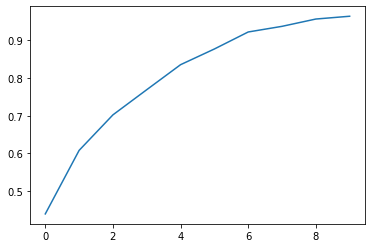

In [18]:
# Accuracy graph

accu = history.history['accuracy']
plt.plot(accu)

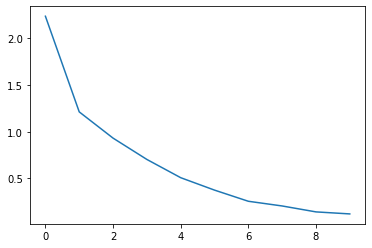

In [19]:
# Losses graph

losss = history.history['loss']
plt.plot(losss)

In [21]:

test_img_data = []
size = len(x_test)

for i in tqdm(range(size)):
    image = Image.open('E:\ML PROJECT\Human Action Recognition (HAR)/train/'
                       + x_test[i])
    test_img_data.append(np.asarray(image.resize((160,160))))

scores = model.evaluate(np.asarray(test_img_data), y_test)
print(f"Test Accuracy: {scores[1]}")

  0%|          | 0/1260 [00:00<?, ?it/s]

40/40 [==============================] - 377s 9s/step - loss: 2.5996 - accuracy: 0.5310
Test Accuracy: 0.5309523940086365


In [22]:
def read_image(fn):
    image = Image.open(fn)
    return np.asarray(image.resize((160,160)))

In [23]:
def test_predict(test_image):
    result = model.predict(np.asarray([read_image(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = classes[itemindex[1][0]]
    print("Accuracy : "+str(np.max(result)*100) + "%\nPredicted class : ",
          prediction)

    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

1/1 [==============================] - 1s 1s/step
Accuracy : 99.9553382396698%
Predicted class :  running


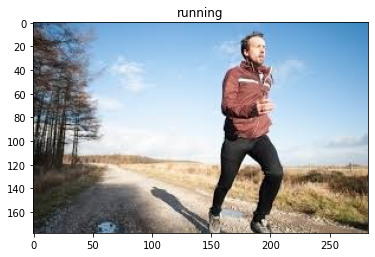

In [24]:
test_predict('E:\ML PROJECT\Human Action Recognition (HAR)/test/Image_100.jpg')

1/1 [==============================] - 1s 668ms/step
Accuracy : 100.0%
Predicted class :  dancing


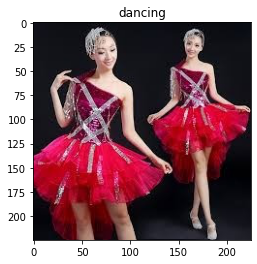

In [26]:
test_predict('E:\ML PROJECT\Human Action Recognition (HAR)/test/Image_5400.jpg')

1/1 [==============================] - 1s 760ms/step
Accuracy : 98.62954020500183%
Predicted class :  texting


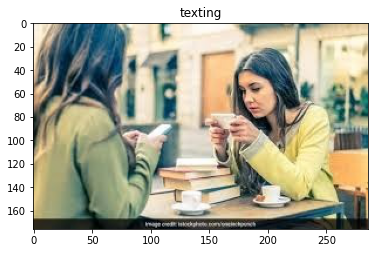

In [31]:
test_predict('E:\ML PROJECT\Human Action Recognition (HAR)/test/Image_1024.jpg')

1/1 [==============================] - 1s 576ms/step
Accuracy : 93.49019527435303%
Predicted class :  drinking


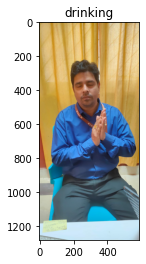

In [32]:
test_predict('E:\ML PROJECT\Human Action Recognition (HAR)/test/Image_5401.jpeg')

1/1 [==============================] - 1s 1s/step
Accuracy : 42.24831461906433%
Predicted class :  fighting


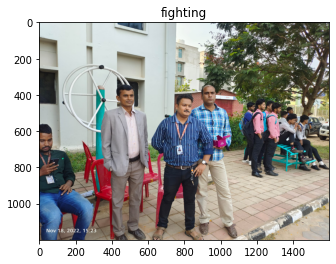

In [33]:
test_predict('E:\ML PROJECT\Human Action Recognition (HAR)/test/Image_5402.jpeg')

1/1 [==============================] - 1s 1s/step
Accuracy : 98.82199764251709%
Predicted class :  sitting


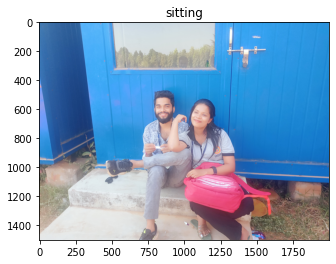

In [34]:
test_predict('E:\ML PROJECT\Human Action Recognition (HAR)/test/Image_5403.jpeg')

1/1 [==============================] - 0s 493ms/step
Accuracy : 78.57455015182495%
Predicted class :  laughing


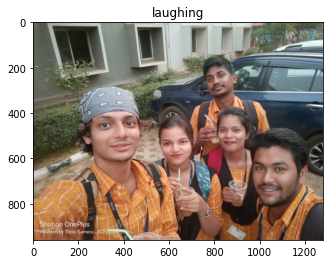

In [35]:
test_predict('E:\ML PROJECT\Human Action Recognition (HAR)/test/Image_5404.jpeg')

1/1 [==============================] - 0s 436ms/step
Accuracy : 80.46220541000366%
Predicted class :  sleeping


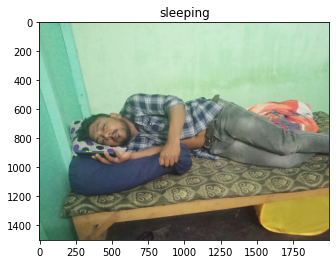

In [36]:
test_predict('E:\ML PROJECT\Human Action Recognition (HAR)/test/Image_5405.jpeg')

1/1 [==============================] - 1s 726ms/step
Accuracy : 99.99940395355225%
Predicted class :  running


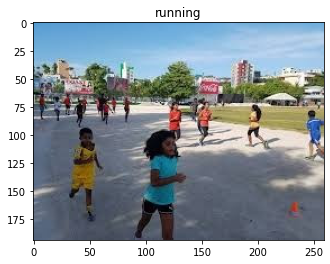

In [48]:
test_predict('E:\ML PROJECT\Human Action Recognition (HAR)/test/Image_78.jpg')

1/1 [==============================] - 1s 554ms/step
Accuracy : 99.83731508255005%
Predicted class :  hugging


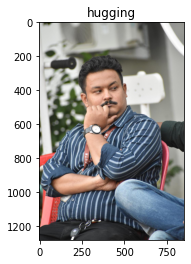

In [43]:
test_predict('E:\ML PROJECT\Human Action Recognition (HAR)/test/Image_5411.jpeg')

1/1 [==============================] - 1s 512ms/step
Accuracy : 100.0%
Predicted class :  running


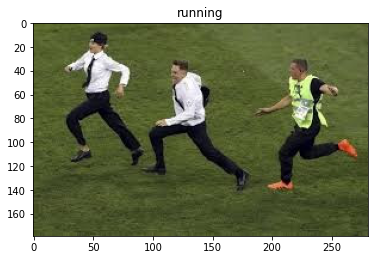

In [42]:
test_predict('E:\ML PROJECT\Human Action Recognition (HAR)/test/Image_506.jpg')

1/1 [==============================] - 1s 526ms/step
Accuracy : 62.58569359779358%
Predicted class :  listening_to_music


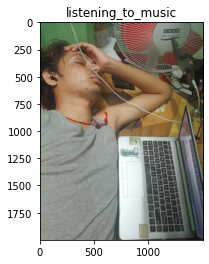

In [49]:
test_predict('E:\ML PROJECT\Human Action Recognition (HAR)/test/Image_5413.jpeg')


1/1 [==============================] - 1s 545ms/step
Accuracy : 96.25272750854492%
Predicted class :  dancing


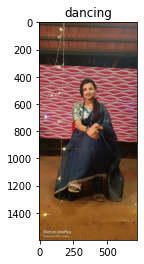

In [50]:
test_predict('E:\ML PROJECT\Human Action Recognition (HAR)/test/Image_5414.jpeg')

1/1 [==============================] - 1s 556ms/step
Accuracy : 99.99990463256836%
Predicted class :  eating


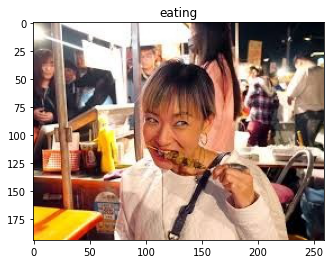

In [64]:
test_predict('E:\ML PROJECT\Human Action Recognition (HAR)/test/Image_3567.jpg')

1/1 [==============================] - 0s 453ms/step
Accuracy : 34.729745984077454%
Predicted class :  fighting


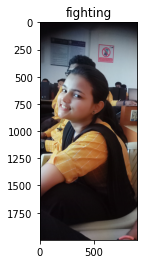

In [53]:
test_predict('E:\ML PROJECT\Human Action Recognition (HAR)/test/Image_5417.jpeg')

1/1 [==============================] - 0s 487ms/step
Accuracy : 54.87639904022217%
Predicted class :  clapping


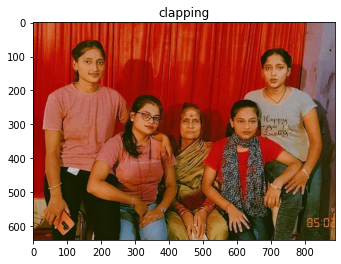

In [54]:
test_predict('E:\ML PROJECT\Human Action Recognition (HAR)/test/Image_5418.jpeg')

1/1 [==============================] - 0s 480ms/step
Accuracy : 77.86110043525696%
Predicted class :  dancing


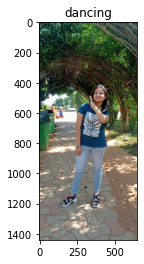

In [57]:
test_predict('E:\ML PROJECT\Human Action Recognition (HAR)/test/Image_5421.jpeg')